## Demonstrate Fitting Audio Data with CMFPY
Data comes from the test section of the Vox Celeb 1 dataset.
The dataset can be found here: http://www.robots.ox.ac.uk/~vgg/data/voxceleb/vox1.html

In [126]:
import matplotlib.pyplot as plt

from cmfpy import CMF 
from cmfpy.utils import visual 
from cmfpy.datasets import vox_celeb
import pickle
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data
If needed, the VoxCeleb dataset class will concatenate multiple audio segments found in the specified folder.

In [119]:
VC = vox_celeb.VoxCeleb(4, "/Users/Bantin/Downloads/wav/id10270/OmSWVqpb-N0/")

(data, x) = VC.generate()
data /= np.max(data)

plt.figure(figsize=(200,200))
plt.imshow(data)

## Fit Audio Data using cmfpy

100%|██████████| 1000/1000 [01:03<00:00, 16.46it/s]


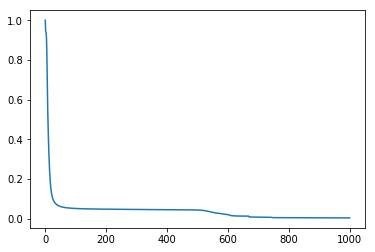

In [122]:
components=10
lag=100
window_size=500
model = CMF(n_components=components,
            maxlag=lag,
            alg_name='mult',
            n_iter_max=1000,
            tol=1e-6)
model.fit(data)
plt.plot(model.loss_hist)

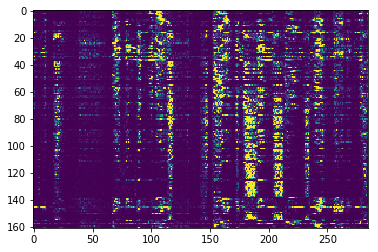

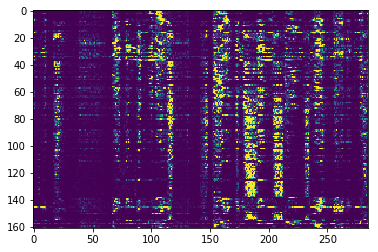

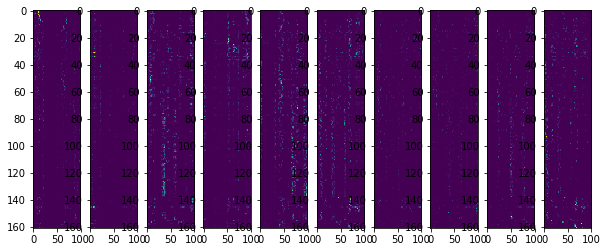

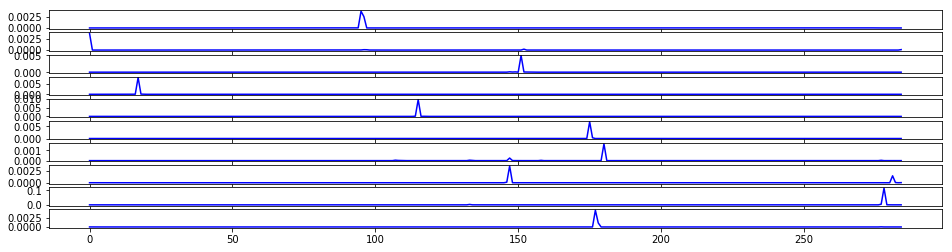

In [123]:
ordering = visual.sort_neurons(model._W)

plt.figure()
plt.imshow(model.predict()[ordering,:], aspect='auto', clim=(0, 0.1))

plt.figure()
plt.imshow(data[ordering,:], aspect='auto', clim=(0, 0.1))

plt.figure(figsize=(10,4))
for i in range(components):
    plt.subplot(1, components, i+1)
    plt.imshow(model._W[:,:,i].T[ordering,:], aspect='auto')

visual.plot_H_components(model._H)
plt.show()